# 1.Visualizing Data with Python

파이썬에는 시각화를 도와주는 다양한 라이브러리가 있다. 본 강의에서는 데이터 시각화를 위해 matplotlib과 seaborn을 사용할 것이다.

## 1.1 Weather Data Visualization

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Data
data = pd.read_csv("/content/drive/MyDrive/_SocialComp_2022-Lab/Week5/weather-mod.csv")

In [ ]:
data.index = data.date
data = data.drop(["date"], axis=1)

In [ ]:
data.head()

## 1.2 mean_temp와 mean_humidity로 그리는 scatterplot 

In [ ]:
fig, axe = plt.subplots()
axe.scatter(data.mean_temp, data.mean_humidity, marker = "o")
axe.set_title("Mean Temperature and Mean Humidity")

## 1.3 cloud_cover와 mean_temp, mean_humidity는 각각 상관관계가 있을까?

In [ ]:
sb.regplot(x=data["cloud_cover"], y=data["mean_temp"])

In [ ]:
sb.regplot(x=data["cloud_cover"], y=data["mean_humidity"])

In [ ]:
sb.regplot(x=data["mean_temp"], y=data["mean_humidity"])

## 1.4 모든 변인들의 상관관계 그래프

In [ ]:
sub_data = data[['mean_temp', 'mean_dew', 'mean_humidity', 'min_humidity', 
       'mean_pressure', 'mean_visibility', 'mean_wind', 'precipitation',
       'cloud_cover']]

In [ ]:
sb.pairplot(sub_data, kind="reg")
plt.show()

In [ ]:
sb.pairplot(sub_data, kind="scatter")
plt.show()

# 2.Gapminder Data Visualization

In [10]:
def read_gapminder_data(filename, colname):
    data = pd.read_csv("/content/drive/MyDrive/_SocialComp_2022-Lab/_SocialComp_2022-Lab/Week5/gapminder/{}".format(filename), header=None)
    data.columns = ["country", colname]
    data.index = data.country
    data = data.drop(['country'], axis=1)
    return data

In [11]:
employment = read_gapminder_data("employment.csv", "employment")
life_exp = read_gapminder_data("life_expectancy.csv", "life_exp")
gdp = read_gapminder_data("gdp_per_capita.csv", "gdp")

In [12]:
frames = [employment, life_exp, gdp]
gm_data = pd.concat(frames, axis=1)

In [13]:
gm_data.head()

,employment,life_exp,gdp
country,,,
Albania,51.400002,74.7,1681.613910
Algeria,50.500000,75.0,2155.485231
Angola,75.699997,57.6,562.987685
Argentina,58.400002,75.4,9388.688523
Armenia,40.099998,72.3,1424.190562


## 2.1 변인들 간의 상관관계

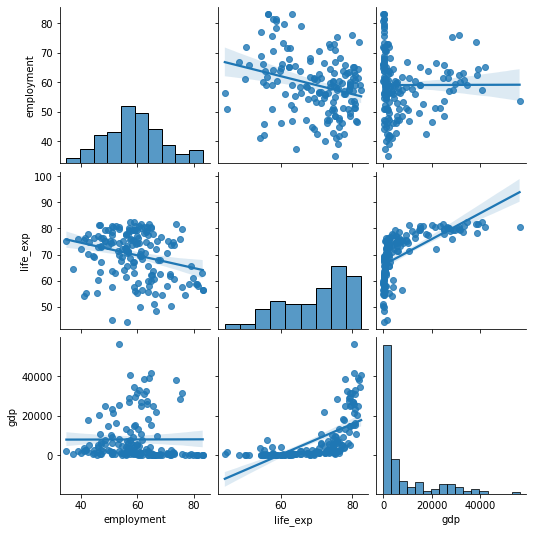

In [14]:
sb.pairplot(gm_data, kind="reg")
plt.show()

## 2.2 Bubble Graph

Bubble Graph는 세개의 변인을 이용한 그래프.

x, y 이외에 z는 점의 크기로 표현된다.

다음의 동영상은 Factfullness 라는 책으로 유명한 통계학자 Hans Rosling의 TED 강의입니다. 이 강의에서 Hans Rosling은 Gapminder라는 도구를 이용하여 데이터를 분석하는 사례를 보여주고 있습니다.

https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen/transcript?language=ko 

본 강의에서는 gapminder와 같은 시각화 결과물을 만들어 볼 예정입니다.

gm_data는 많은 양의 데이터를 담고 있기 때문에 랜돔하게 50개 정도를 선택하여 gm_subset에 저장한다.

이 그래프에서 x 축은 index 인 국가명을 표시하고, y 축은 기대수명(life_exp), 버블의 크기인 z는 gdp를 표현한다.

In [15]:
gm_subset = gm_data.sample(n=50)
x = gm_subset.index
y = gm_subset.life_exp
z = gm_subset.gdp

In [16]:
gm_subset

,employment,life_exp,gdp
country,,,
Albania,51.400002,74.700,1681.613910
South Africa,41.099998,54.100,3704.084266
Argentina,58.400002,75.400,9388.688523
Israel,51.299999,80.600,21469.534510
Spain,52.500000,80.900,16351.111080
Algeria,50.500000,75.000,2155.485231
Guyana,58.900002,63.100,1107.351968
"Macedonia, FYR",34.900002,75.200,2110.685735
Egypt,42.400002,70.100,1765.869427


Text(0.5, 1.0, 'Gapminder - Life Expectancy and GDP')

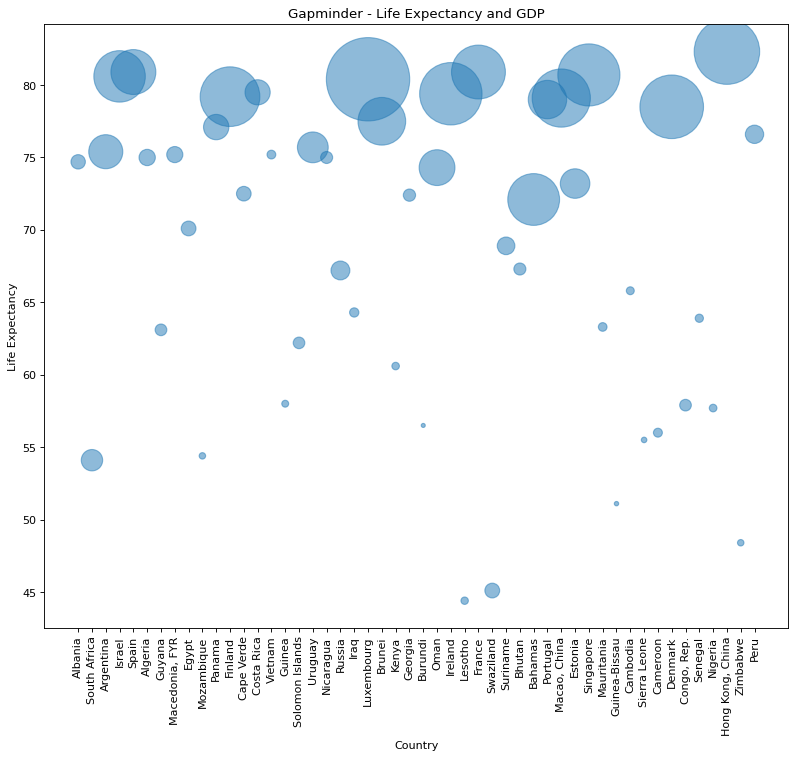

In [17]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/10, alpha=0.5)
 
# # Add titles (main and on axis)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.title("Gapminder - Life Expectancy and GDP")

## 2.3 gdp를 기준으로 sorting 한 그래프

In [18]:
gm_subset_sorted = gm_subset.sort_values(['gdp'], ascending=True)
gm_subset_sorted

,employment,life_exp,gdp
country,,,
Burundi,83.199997,56.500,133.286878
Guinea-Bissau,65.900002,51.100,155.994801
Sierra Leone,63.799999,55.500,251.417017
Mozambique,77.000000,54.400,339.063814
Zimbabwe,66.800003,48.400,339.654883
Guinea,81.500000,58.000,387.751635
Lesotho,56.299999,44.400,446.320416
Kenya,73.199997,60.600,461.019375
Nigeria,50.900002,57.700,476.214166


In [19]:
x = gm_subset_sorted.index
y = gm_subset_sorted.life_exp
z = gm_subset_sorted.gdp

Text(0.5, 1.0, 'Gapminder - Life Expectancy and GDP')

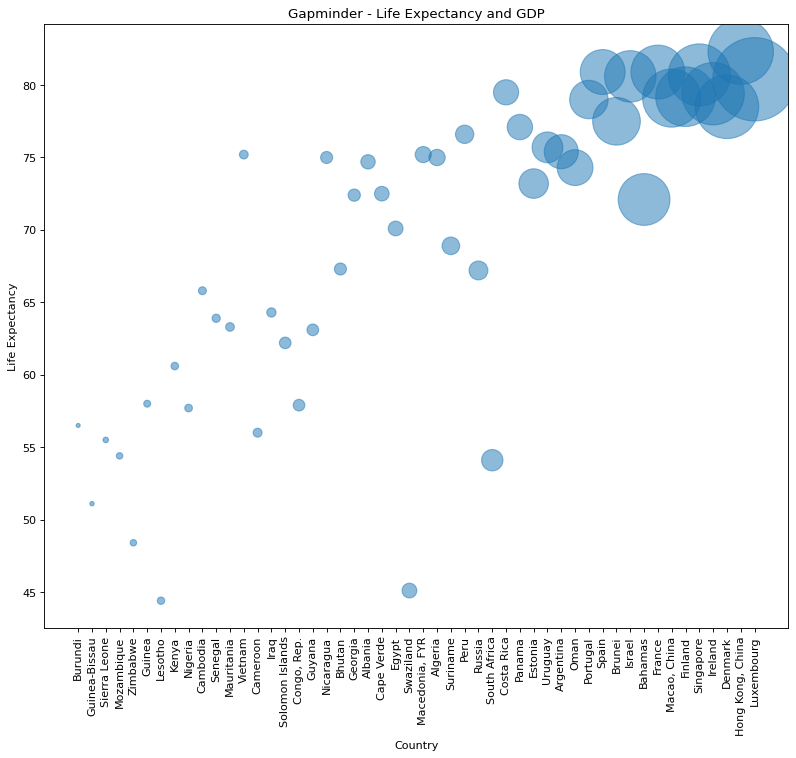

In [20]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/10, alpha=0.5)
 
# Add titles (main and on axis)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.title("Gapminder - Life Expectancy and GDP")

## 2.4 Seaborn을 이용한 그래프

In [21]:
# 삭제했던 "country" 컬럼이 다시 필요.
gm_subset_sorted["country"] = gm_subset_sorted.index
gm_subset_sorted

,employment,life_exp,gdp,country
country,,,,
Burundi,83.199997,56.500,133.286878,Burundi
Guinea-Bissau,65.900002,51.100,155.994801,Guinea-Bissau
Sierra Leone,63.799999,55.500,251.417017,Sierra Leone
Mozambique,77.000000,54.400,339.063814,Mozambique
Zimbabwe,66.800003,48.400,339.654883,Zimbabwe
Guinea,81.500000,58.000,387.751635,Guinea
Lesotho,56.299999,44.400,446.320416,Lesotho
Kenya,73.199997,60.600,461.019375,Kenya
Nigeria,50.900002,57.700,476.214166,Nigeria


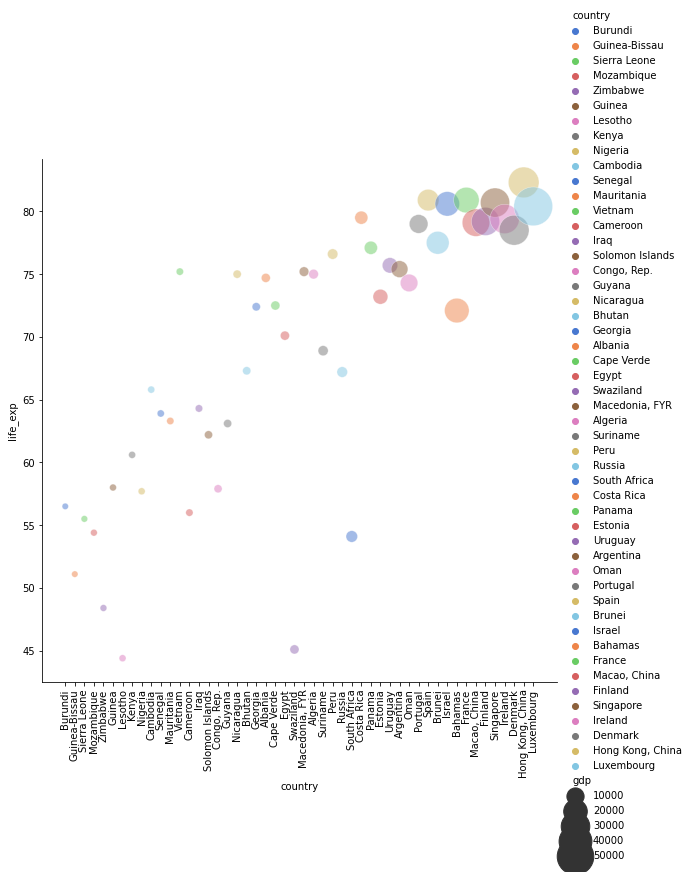

In [22]:
# Plot miles per gallon against horsepower with other semantics
bubble = sb.relplot(x="country", y="life_exp", hue="country", size="gdp",
            sizes=(40, 1500), alpha=.5, palette="muted",
            height=8, data=gm_subset_sorted)
bubble.set_xticklabels(rotation=90)
